# Data Mining for Retail Stores
> - ***<u>Ονοματεπώνυμο</u> : Κωνσταντίνος - Ηλίας Χονδρορρίζος***
> - ***<u>Α.Ε.Μ.</u> : 3812***

In [1]:
# Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates


pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid", palette="dark:#5A9_r")


In [2]:
print(sns.color_palette("dark:#5A9_r").as_hex())

['#55aa99', '#4b9082', '#41756b', '#375b54', '#2d413d', '#232626']


### Raw data manipulation:
 1. Starting off this project, lets start by loading the data from the csv file.
 2. After that, I am going to drop the requested items,
 3. one hot encoding to the items,
 4. perform differentiation of the basket_value attribute,
 5. and visualize the data using various techniques.

In [3]:
transactions_init = pd.read_csv("GroceriesInitial.csv")
print(f"Total rows: {len(transactions_init)}")
transactions_init.head()

Total rows: 7536


,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10,Item_11,Item_12,Item_13,Item_14,Item_15,Item_16,Item_17,Item_18,Item_19,Item_20,Item_21,Item_22,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


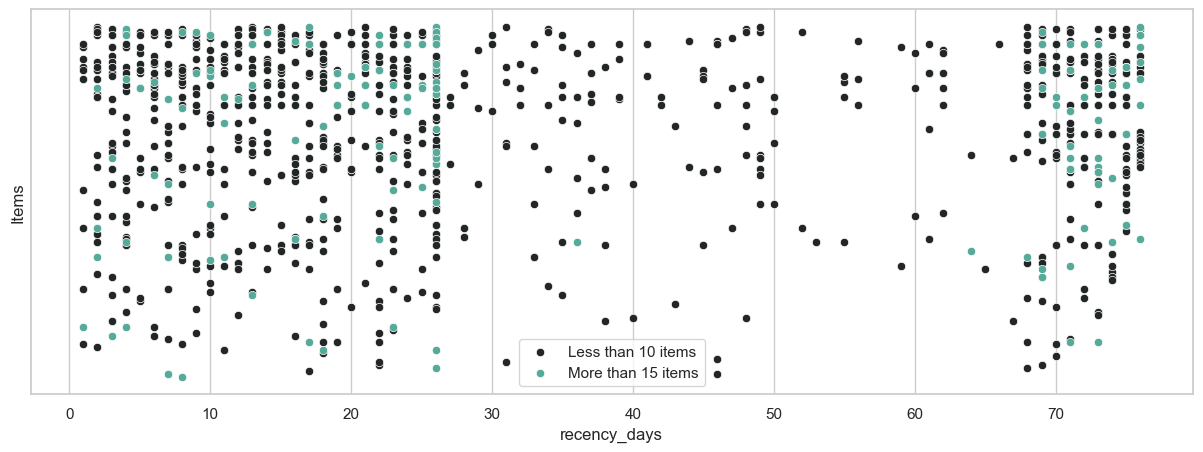

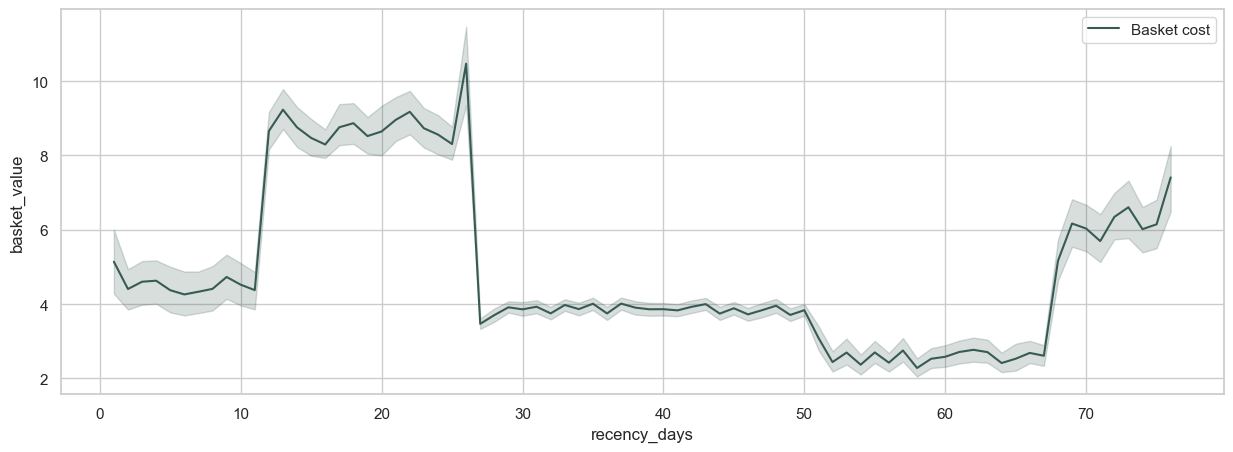

In [4]:
fig, axes = plt.subplots(figsize=(15,5))

sns.scatterplot(ax = axes, data = transactions_init, x = "recency_days", y = "Item_10", color="#232626")
sns.scatterplot(ax = axes, data = transactions_init, x = "recency_days", y = "Item_16", color="#55aa99")
plt.legend(["Less than 10 items","More than 15 items"])
plt.yticks([])
plt.ylabel("Items")

fig = plt.figure(figsize=(15,5))
sns.lineplot(data = transactions_init, x = "recency_days", y = "basket_value", color = "#375b54")
plt.legend(["Basket cost"])
plt.show()

In [5]:
def isNaN(num):
    return num == num

for index,i in enumerate(transactions_init["Item_32"]):
    if isNaN(i):
        print(index)
    

947


In [6]:
PRODUCTS = ["citrus fruit", "tropical fruit", "whole milk", "other vegetables", "rolls/buns", "chocolate", 
            "bottled water", "yogurt", "sausage", "root vegetables", "pastry", "soda", "cream"]
def keep_products(product):
    if product in PRODUCTS:
        return product
    
    return float("nan")

info_cols = transactions_init.iloc[:,:3]
item_cols = transactions_init.iloc[:, 3:].applymap(lambda x :keep_products(x))

In [7]:
ids = []

one_hot_items = np.empty([0,13], dtype = np.int8)

for index,row in item_cols.iterrows():
    if row.isnull().sum() == 32:
        ids.append(index)
    else:
        transact = np.zeros(shape=(1, 13) ,dtype = np.int8)
        for i in row.dropna().tolist():
            transact[0,PRODUCTS.index(i)] = 1
        one_hot_items = np.vstack((one_hot_items, transact))
        
items = pd.DataFrame(one_hot_items, columns=PRODUCTS)        

In [8]:
transactions = pd.concat([info_cols.drop(ids).reset_index(drop=True), items], axis=1)
transactions.head()

,id,basket_value,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
0,1,1.1,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3.6,31,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,1.2,7,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,6.6,7,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,2.5,66,0,0,1,1,0,0,0,0,0,0,0,0,0


In [9]:
transactions.describe(percentiles=[.33,.66])

,id,basket_value,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
count,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000
mean,4914.981043,5.057465,37.349661,0.112633,0.142798,0.347724,0.263318,0.250311,0.067525,0.150408,0.189844,0.127854,0.148333,0.121074,0.237305,0.001799
std,2848.204059,3.762228,25.329775,0.316166,0.349891,0.476281,0.440464,0.433222,0.250946,0.357496,0.392204,0.333950,0.355454,0.326236,0.425460,0.042377
min,1.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33%,3238.580000,2.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4899.000000,4.100000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66%,6492.320000,6.000000,54.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9835.000000,25.100000,76.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


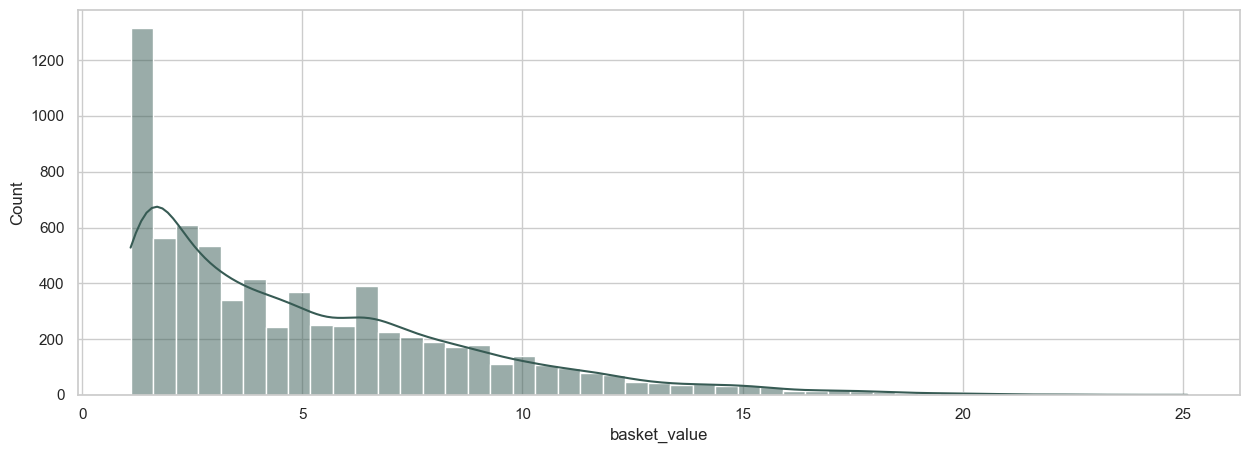

In [10]:
fig = plt.figure(figsize=(15,5))
sns.histplot(transactions["basket_value"], kde=True, color = "#375b54")

plt.show()

In [11]:
print(f"First bucket :  {len(transactions.loc[transactions['basket_value'] < 2.5])}")
print(f"Second bucket: {len(transactions.loc[(transactions['basket_value'] < 6) & (transactions['basket_value'] >= 2.5)])}")
print(f"Third bucket :  {len(transactions.loc[transactions['basket_value'] >= 6])}")

First bucket :  2312
Second bucket: 2434
Third bucket :  2481


In [12]:
transactions.loc[transactions['basket_value'] < 2.9, 'value_slot'] = "Low"
transactions.loc[(transactions['basket_value'] < 6.3) & (transactions['basket_value'] >= 2.9), 'value_slot'] = "Medium"
transactions.loc[transactions['basket_value'] >= 6.3, 'value_slot'] = "High"

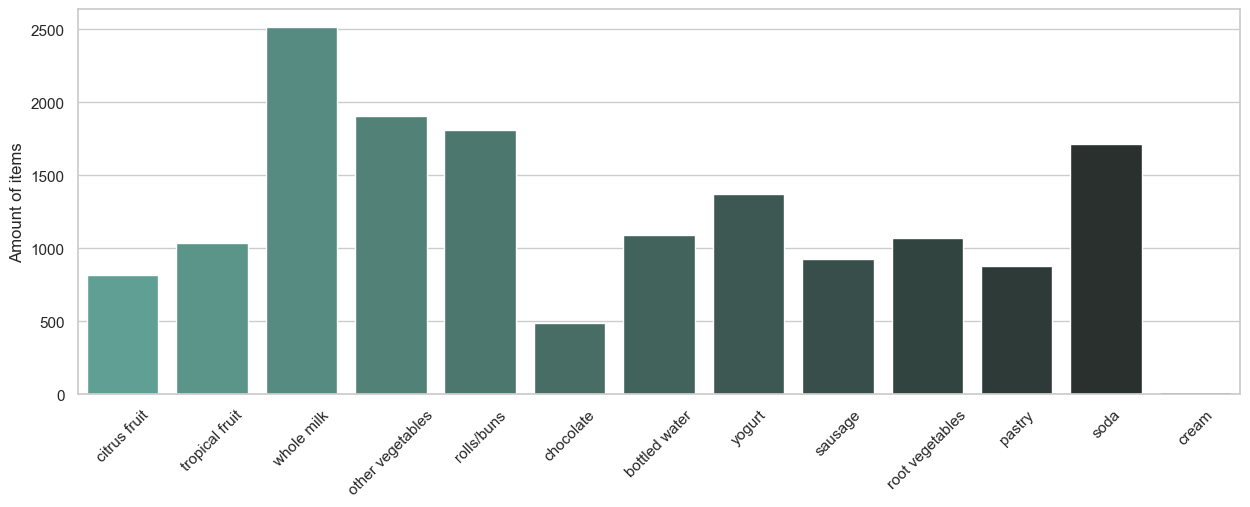

In [13]:
dictionary = {}
for i in PRODUCTS:
    dictionary[i] = transactions[i].sum()
    
fig = plt.figure(figsize=(15,5))
sns.barplot(x = list(dictionary.keys()), y = list(dictionary.values()), palette="dark:#5A9_r")
plt.xticks(rotation=45)
plt.ylabel("Amount of items")
plt.show()

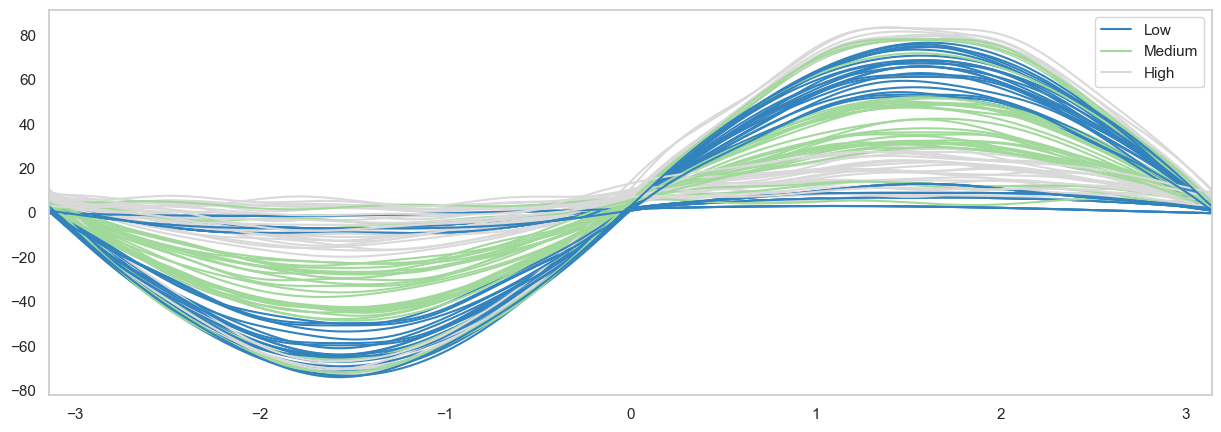

In [14]:
fig = plt.figure(figsize=(15,5))
pd.plotting.andrews_curves(transactions.iloc[:100,1:], 'value_slot' ,colormap="tab20c")
plt.show()

In [15]:
transactions[['recency_days']] = preprocessing.MinMaxScaler().fit_transform(transactions[['recency_days']])
transactions[['basket_value']] = preprocessing.MinMaxScaler().fit_transform(transactions[['basket_value']])

### Assosiation rules with A-priori algorithm:
 1. Run the algorith for multiple minimum support value.
 2. Find the top 20 rules based on itemset confidence.
 3. Find the top 20 rules based on itemset and basket value confidence.
 4. Interpretation and draw conclusions about the rules.

### Assosiation rules with A-priori algorithm:
 1. Run the algorith for multiple minimum support value.
 2. Find the top 20 rules based on itemset confidence.
 3. Find the top 20 rules based on itemset and basket value confidence.
 4. Interpretation and draw conclusions about the rules.

### <u>First Subquery</u>

In [16]:
transactions[['recency_days']] = preprocessing.MinMaxScaler().fit_transform(transactions[['recency_days']])

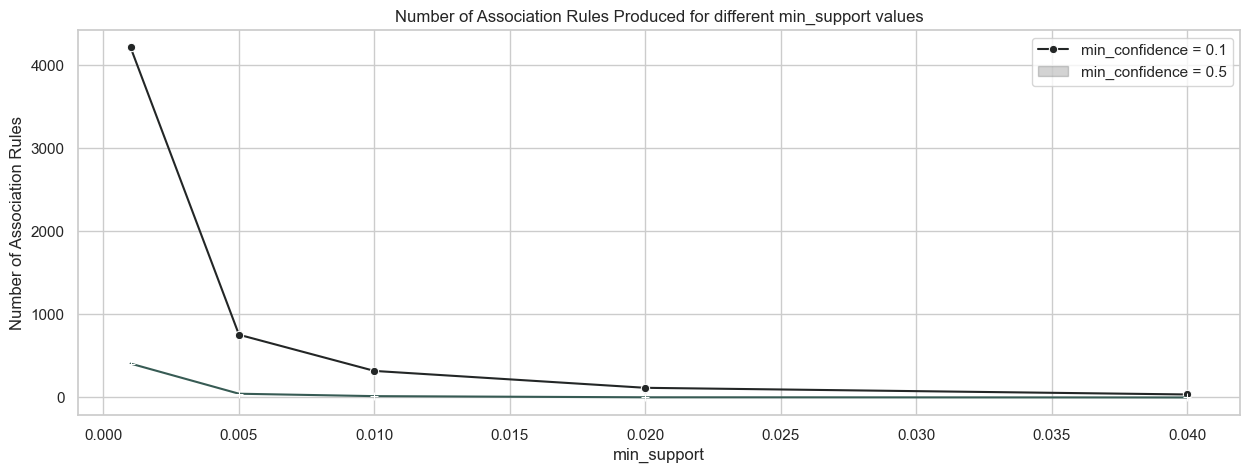

In [17]:
support = [.001, .005, .01, .02, .04]
number_of_rules1 = []
number_of_rules2 = []
for sup in support:
    number_of_rules1.append(len(association_rules(apriori(transactions.iloc[:,3:-1].astype(bool), min_support=sup, use_colnames=True), 
                                metric="confidence", min_threshold=0.1)))
    number_of_rules2.append(len(association_rules(apriori(transactions.iloc[:,3:-1].astype(bool), min_support=sup, use_colnames=True), 
                                metric="confidence", min_threshold=0.5)))

fig = plt.figure(figsize=(15,5))
sns.lineplot(x=support, y=number_of_rules1, marker='o',color="#232626")
sns.lineplot(x=support, y=number_of_rules2, marker='+',color="#375b54")
plt.legend(["min_confidence = 0.1", "min_confidence = 0.5"])
plt.title("Number of Association Rules Produced for different min_support values")
plt.xlabel("min_support")
plt.ylabel("Number of Association Rules")
plt.show()

### <u>Second Subquery</u>


In [18]:
def extract_rules(results):
    
    lhs        = list(results.iloc[:,0])
    rhs        = list(results.iloc[:,1])

    support    = list(results.iloc[:,4])

    confidence = list(results.iloc[:,5])
    lift       = list(results.iloc[:,6])


    return list(zip(lhs, rhs, support, confidence, lift))  

In [19]:
# Run Apriori algorithm with min_support=0.03 and min_confidence=0.1 and print the results
items = apriori(transactions.iloc[:,3:-1].astype(bool), min_support=.03, use_colnames=True)
as_rules = association_rules(items, metric="confidence", min_threshold=.25)

df_rules = pd.DataFrame(extract_rules(as_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
ids = np.append(df_rules.loc[df_rules["Left_Hand_Side"] == ()].index.values ,df_rules.loc[df_rules["Right_Hand_Side"] == ()].index.values)
df_rules.drop(ids, inplace=True)

print(f"Total number of association rules : {df_rules.shape[0]}")

Total number of association rules : 26


In [20]:
df_rules.iloc[:,0:-1].sort_values(by=['Confidence'], ascending=False).head(20).T

,22,24,23,11,15,2,9,21,6,12,0,1,3,17,10,13,8,25,7,20
Left_Hand_Side,"(other vegetables, yogurt)","(root vegetables, other vegetables)","(root vegetables, whole milk)",(root vegetables),(root vegetables),(tropical fruit),(yogurt),"(whole milk, yogurt)",(other vegetables),(pastry),(citrus fruit),(citrus fruit),(tropical fruit),(sausage),(sausage),(yogurt),(bottled water),"(whole milk, other vegetables)",(rolls/buns),"(whole milk, other vegetables)"
Right_Hand_Side,(whole milk),(whole milk),(other vegetables),(whole milk),(other vegetables),(whole milk),(whole milk),(other vegetables),(whole milk),(whole milk),(whole milk),(other vegetables),(other vegetables),(rolls/buns),(whole milk),(other vegetables),(whole milk),(root vegetables),(whole milk),(yogurt)
Support,0.030303,0.031548,0.031548,0.066556,0.06448,0.057562,0.076242,0.030303,0.10184,0.045247,0.041511,0.039297,0.048845,0.041649,0.040681,0.059084,0.046769,0.031548,0.077072,0.030303
Confidence,0.512881,0.48927,0.474012,0.448694,0.434701,0.403101,0.401603,0.397459,0.386758,0.373714,0.36855,0.348894,0.342054,0.325758,0.318182,0.311224,0.310948,0.309783,0.307905,0.297554


### <u>Third Subquery</u>

In [21]:
df = pd.get_dummies(transactions,prefix=['value_slot'], columns = ['value_slot'])

In [22]:
# Run Apriori algorithm with min_support=0.02 and min_confidence=0.1 and print the results
items = apriori(df.iloc[:,3:].astype(bool), min_support=.04, use_colnames=True)
as_rules = association_rules(items, metric="confidence", min_threshold=.0)

df_rules = pd.DataFrame(extract_rules(as_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
ids = np.append(df_rules.loc[df_rules["Left_Hand_Side"] == ()].index.values ,df_rules.loc[df_rules["Right_Hand_Side"] == ()].index.values)
df_rules.drop(ids, inplace=True)

print(f"Total number of association rules : {df_rules.shape[0]}")

Total number of association rules : 140


In [23]:
df_rules.sort_values(by=['Confidence'], ascending=False).head(20).T

,136,71,86,118,124,76,129,105,110,99,94,8,111,128,87,72,67,106,93,55
Left_Hand_Side,"(sausage, rolls/buns)",(sausage),"(tropical fruit, whole milk)","(other vegetables, rolls/buns)","(other vegetables, yogurt)",(pastry),"(root vegetables, other vegetables)","(whole milk, yogurt)","(root vegetables, whole milk)","(whole milk, rolls/buns)","(whole milk, other vegetables)",(tropical fruit),"(root vegetables, value_slot_High)","(root vegetables, value_slot_High)","(tropical fruit, value_slot_High)",(root vegetables),(yogurt),"(value_slot_High, yogurt)","(other vegetables, value_slot_High)",(rolls/buns)
Right_Hand_Side,(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(whole milk),(other vegetables),(whole milk),(value_slot_High),(value_slot_High),(whole milk),(whole milk),(value_slot_High)
Support,0.041649,0.103501,0.04248,0.040819,0.041234,0.079701,0.042341,0.04926,0.042756,0.048845,0.060329,0.079424,0.042756,0.042341,0.04248,0.077487,0.098104,0.04926,0.060329,0.119275
Confidence,1.0,0.809524,0.737981,0.704057,0.697892,0.658286,0.656652,0.646098,0.642412,0.633752,0.592391,0.556202,0.551786,0.546429,0.534843,0.522388,0.516764,0.502116,0.491545,0.476506
Lift,3.088462,2.500183,2.279225,2.174454,2.155413,2.03309,2.028046,1.995449,1.984064,1.957319,1.829578,1.717807,1.586851,2.075165,1.538126,1.613375,1.596005,1.444007,1.413606,1.471672


### <u>Fourth Subquery</u>

### Clustering using K-Means algorithm:
 1. Perform a 5-Means clustering for the basket_value and recency_days columns.
 2. Conduct statistical analysis and interpretation of the resulting clusters.
 3. Prepare the dataset so that it can be used in conjunction with association rules.

In [24]:
df = transactions.loc[:,["basket_value","recency_days"]]

### <u>1st Subquery</u>

In [25]:
kmeans = KMeans(n_clusters = 5, random_state = 4, n_init = "auto").fit(df)
df["cluster"] = kmeans.labels_
df["slot"] = transactions["value_slot"]

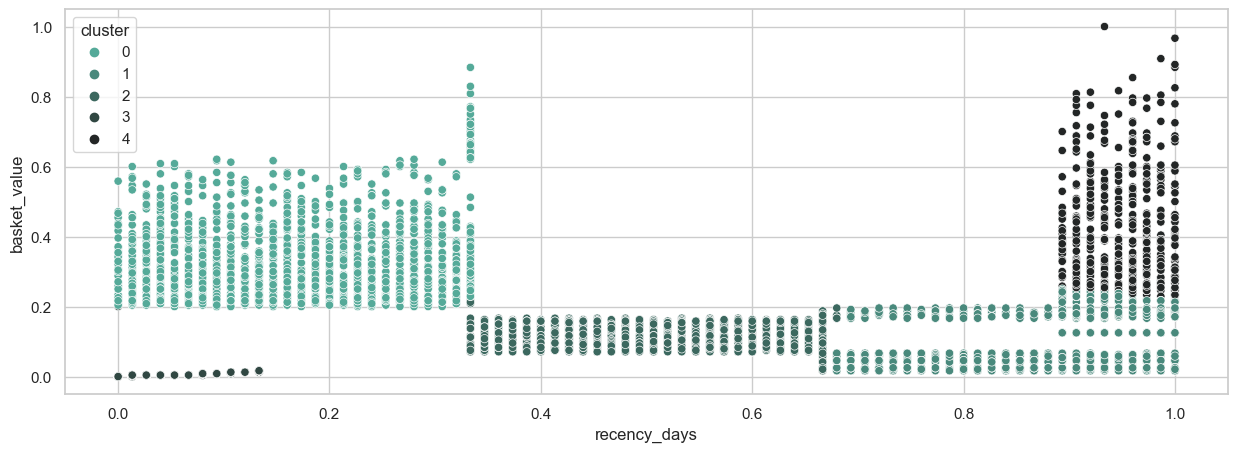

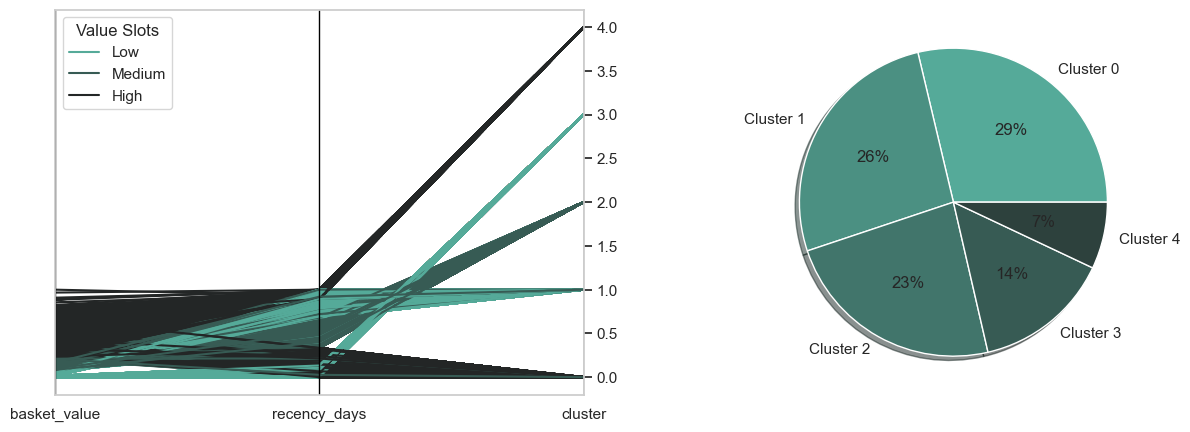

In [26]:
size = 0.3
fig = plt.figure(figsize=(15,5))


sns.scatterplot(data = df, x = "recency_days", y = "basket_value", hue = "cluster",palette="dark:#5A9_r")
#plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

fig ,axes = plt.subplots(1,2,figsize=(15,5))
"""
axes[1].pie(df['cluster'].value_counts(), radius=1,labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
       wedgeprops=dict(width=size, edgecolor='w'))

axes[1].pie(transactions['value_slot'].value_counts(), radius=1-size, labels = ['Slot 1', 'Slot 2', 'Slot 3'], 
        labeldistance=0.63, colors =['#41756b', '#375b54', '#2d413d'], wedgeprops=dict(width=size, edgecolor='w'))"""

pd.plotting.parallel_coordinates(df, 'slot', ax = axes[0], color = ['#55aa99','#375b54', '#232626'])
axes[0].legend(title = "Value Slots")
axes[0].yaxis.tick_right()

axes[1].pie(df['cluster'].value_counts() ,labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], 
            autopct='%.0f%%', shadow=True)

plt.show()

In [27]:
df = 

SyntaxError: invalid syntax (1581804619.py, line 1)

In [ ]:
df.groupby(["cluster"]).mean()

### <u>Second Subquery</u>

In [ ]:
transactions['value_slot'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
    
grouped_df = df.groupby(["cluster"], as_index=False)
std = grouped_df.std()

grouped_df.mean(numeric_only = True).plot(x="cluster", y=["basket_value", "recency_days"], 
                       kind="bar", ax=ax, capsize=4, rot=0, yerr=std, xlabel= "")

cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
cluster_values = range(len(cluster_labels))
cluster_map = dict(zip(cluster_labels, cluster_values))

ax.set_xticklabels(cluster_labels)
ax.set_xticks(cluster_values)
plt.title("Mean Value Shown By Bars and Standard Deviation By Error Bars")

text = f"Std: (basket_value,recency_days)\n\n\
Cluster 0: ({'%.3f'%(std.iloc[0,1])}, {'%.3f'%std.iloc[0,2]})\n\
Cluster 1: ({'%.3f'%(std.iloc[1,1])}, {'%.3f'%std.iloc[1,2]})\n\
Cluster 2: ({'%.3f'%(std.iloc[2,1])}, {'%.3f'%std.iloc[2,2]})\n\
Cluster 3: ({'%.3f'%(std.iloc[3,1])}, {'%.3f'%std.iloc[3,2]})\n\
Cluster 4: ({'%.3f'%(std.iloc[4,1])}, {'%.3f'%std.iloc[4,2]})"

ax.text(0.01,0.67 , text, transform=ax.transAxes, fontsize=14,
        bbox=dict(facecolor='#4b9082', alpha = 0.7, boxstyle='round'), 
        color ="black", backgroundcolor = "#41756b")
plt.legend(loc = "upper center")

plt.show()

### <u>Third Subquery</u>

In [ ]:
transactions["cluster"] = df["cluster"]

In [ ]:
transactions = pd.get_dummies(transactions,prefix=["value_slot", "cluster"], columns = ["value_slot", "cluster"])
transactions.head()

### Combining K-Means and Association Rules:
 1. Find the top 20 rules based on itemset and clusters confidence.
 2. Find the top 20 rules based on itemset, basket value and clusters confidence.

### <u>First Subquery</u>

In [ ]:
# Run Apriori algorithm with min_support=0.02 and min_confidence=0.1 and print the results
items = apriori(transactions.drop(["id","recency_days", "basket_value", "value_slot_Low", "value_slot_Medium", "value_slot_High"], axis=1).astype(bool), min_support=.03, use_colnames=True)
as_rules = association_rules(items, metric="confidence", min_threshold=.0)

df_rules = pd.DataFrame(extract_rules(as_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
ids = np.append(df_rules.loc[df_rules["Left_Hand_Side"] == ()].index.values ,df_rules.loc[df_rules["Right_Hand_Side"] == ()].index.values)
df_rules.drop(ids, inplace=True)

print(f"Total number of association rules : {df_rules.shape[0]}")

In [ ]:
df_rules.iloc[:,0:-1].sort_values(by=['Confidence'], ascending=False).head(20)

### <u>Second Subquery</u>

In [ ]:
# Run Apriori algorithm with min_support=0.02 and min_confidence=0.1 and print the results
items = apriori(transactions.iloc[:,3:].astype(bool), min_support=.04, use_colnames=True)
as_rules = association_rules(items, metric="confidence", min_threshold=.0)

df_rules = pd.DataFrame(extract_rules(as_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
ids = np.append(df_rules.loc[df_rules["Left_Hand_Side"] == ()].index.values ,df_rules.loc[df_rules["Right_Hand_Side"] == ()].index.values)
df_rules.drop(ids, inplace=True)

print(f"Total number of association rules : {df_rules.shape[0]}")

In [ ]:
df_rules.iloc[:,0:-1].sort_values(by=['Confidence'], ascending=False).head(20)